In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/household-power-consumption/Household_power_consumption.csv


#Import Libraries

In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.decomposition import PCA

read Data

In [3]:
data=pd.read_csv('/kaggle/input/household-power-consumption/Household_power_consumption.csv',index_col='datetime')

#print frist 5 data

In [4]:

print(data.head())  

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

#print data columns

In [5]:
x=1
for col in data.columns:
    print(f'col {x} is :',col)
    x+=1 

col 1 is : Global_active_power
col 2 is : Global_reactive_power
col 3 is : Voltage
col 4 is : Global_intensity
col 5 is : Sub_metering_1
col 6 is : Sub_metering_2
col 7 is : Sub_metering_3
col 8 is : sub_metering_4


#data corr  

<AxesSubplot:>

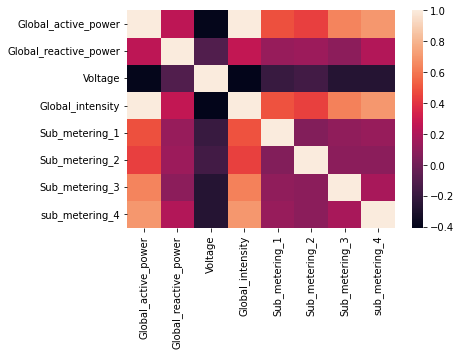

In [6]:

sns.heatmap(data.corr())

#data describe

In [7]:
print(data.describe())

       Global_active_power  Global_reactive_power       Voltage  \
count         2.075259e+06           2.075259e+06  2.075259e+06   
mean          1.089418e+00           1.236871e-01  2.408364e+02   
std           1.054678e+00           1.125933e-01  3.240051e+00   
min           7.600000e-02           0.000000e+00  2.232000e+02   
25%           3.080000e-01           4.800000e-02  2.389900e+02   
50%           6.020000e-01           1.000000e-01  2.410000e+02   
75%           1.526000e+00           1.940000e-01  2.428700e+02   
max           1.112200e+01           1.390000e+00  2.541500e+02   

       Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
count      2.075259e+06    2.075259e+06    2.075259e+06    2.075259e+06   
mean       4.618401e+00    1.118474e+00    1.291131e+00    6.448635e+00   
std        4.433165e+00    6.141460e+00    5.796922e+00    8.433584e+00   
min        2.000000e-01    0.000000e+00    0.000000e+00    0.000000e+00   
25%        1.400000e+

#data information

In [8]:

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5+ MB
None


#show sum of null data

In [9]:

print(data.isnull().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
sub_metering_4           0
dtype: int64


#show sum of duplicated

In [10]:

print(data.duplicated().sum())

168561


#calculation of output power

In [11]:

data['power']=np.sqrt(np.square(data.iloc[:,0]+np.square(data.iloc[:,1])))


#show input X and output y

In [12]:

col=data.shape[1]
X=data.iloc[:,0:col-1]
y=data.iloc[:,col-1:col]
print(col)
print(X.shape)
print(y.shape)


9
(2075259, 8)
(2075259, 1)


#cleaning input X

In [13]:

ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)
print('X Data is \n' , X[:10])
print('y Data is \n' , y[:10])  

X Data is 
 [[  4.216      0.418    234.84      18.4        0.         1.
   17.        52.26667 ]
 [  5.36       0.436    233.63      23.         0.         1.
   16.        72.333336]
 [  5.374      0.498    233.29      23.         0.         2.
   17.        70.566666]
 [  5.388      0.502    233.74      23.         0.         1.
   17.        71.8     ]
 [  3.666      0.528    235.68      15.8        0.         1.
   17.        43.1     ]
 [  3.52       0.522    235.02      15.         0.         2.
   17.        39.666668]
 [  3.702      0.52     235.09      15.8        0.         1.
   17.        43.7     ]
 [  3.7        0.52     235.22      15.8        0.         1.
   17.        43.666668]
 [  3.668      0.51     233.99      15.8        0.         1.
   17.        43.133335]
 [  3.662      0.51     233.86      15.8        0.         2.
   16.        43.033333]]
y Data is 
                         power
datetime                     
2006-12-16 17:24:00  4.390724
2006-12-16 17:2

#scaling input X 

In [14]:
 
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
print('X \n' , X[:10])

X 
 [[0.37479631 0.30071942 0.37609047 0.37759336 0.         0.0125
  0.5483871  0.42965683]
 [0.47836321 0.31366906 0.33699515 0.47302905 0.         0.0125
  0.51612903 0.58737232]
 [0.47963064 0.35827338 0.32600969 0.47302905 0.         0.025
  0.5483871  0.57348704]
 [0.48089806 0.36115108 0.34054927 0.47302905 0.         0.0125
  0.5483871  0.58318052]
 [0.32500453 0.37985612 0.40323102 0.32365145 0.         0.0125
  0.5483871  0.3576107 ]
 [0.31178707 0.37553957 0.3819063  0.30705394 0.         0.025
  0.5483871  0.33062616]
 [0.32826362 0.37410072 0.38416801 0.32365145 0.         0.0125
  0.5483871  0.36232644]
 [0.32808256 0.37410072 0.38836834 0.32365145 0.         0.0125
  0.5483871  0.36206447]
 [0.32518559 0.36690647 0.34862682 0.32365145 0.         0.0125
  0.5483871  0.3578727 ]
 [0.3246424  0.36690647 0.34442649 0.32365145 0.         0.025
  0.51612903 0.35708672]]


#data spliting

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1390423, 8)
X_test shape is  (684836, 8)
y_train shape is  (1390423, 1)
y_test shape is  (684836, 1)


#Applying Linear Regression Model

In [16]:

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True)

#Calculating Details

In [17]:

print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))


Linear Regression Train Score is :  0.999583785911074
Linear Regression Test Score is :  0.9995846372399197


#Calculating Prediction

In [18]:

y_pred = LinearRegressionModel.predict(X_test)
print('Predicted Value for Linear Regression is : ' , y_pred[:10])  

Predicted Value for Linear Regression is :  [[2.14066981]
 [2.62506916]
 [1.60391903]
 [0.58280434]
 [0.42746245]
 [0.49091097]
 [1.58854554]
 [0.49250171]
 [0.26870992]
 [0.28673904]]


#Calculating Mean Absolute Error

In [19]:

MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.013854677364571223


#Calculating Mean Squared Error

In [20]:

MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

Mean Squared Error Value is :  0.00047283088848616836


#Calculating Median Absolute Error

In [21]:

MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Median Absolute Error Value is :  0.013626538842071434


#display y_train ,y_test_train

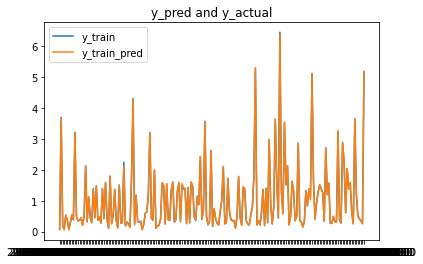

In [22]:

plt.figure()
plt.plot(y_train[:200],label='y_train')
plt.plot(LinearRegressionModel.predict(X_train[:200]),label='y_train_pred')
plt.title('y_pred and y_actual')
plt.legend()

#display y_test ,y_test_pred

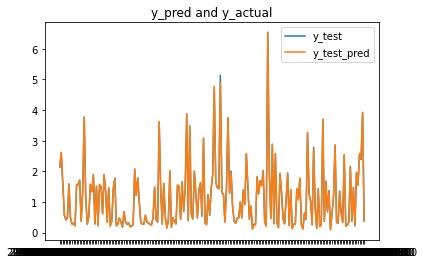

In [23]:

plt.figure()
plt.plot(y_test[:200],label='y_test')
plt.plot(LinearRegressionModel.predict(X_test[:200]),label='y_test_pred')
plt.title('y_pred and y_actual')
plt.legend()